{0: 'Abyssinian', 1: 'Bengal', 2: 'Birman', 3: 'Bombay', 4: 'British_Shorthair', 5: 'Egyptian_Mau', 6: 'Maine_Coon', 7: 'Persian', 8: 'Ragdoll', 9: 'Russian_Blue', 10: 'Siamese', 11: 'Sphynx'}
torch.Size([23, 3, 300, 300])
[ 4  1 10  9  4  3  5  5  4  8  8  8  9  8  9  8  1  6  4  4 11  5 11]
rows=4,cols=6


<Figure size 1500x1500 with 0 Axes>

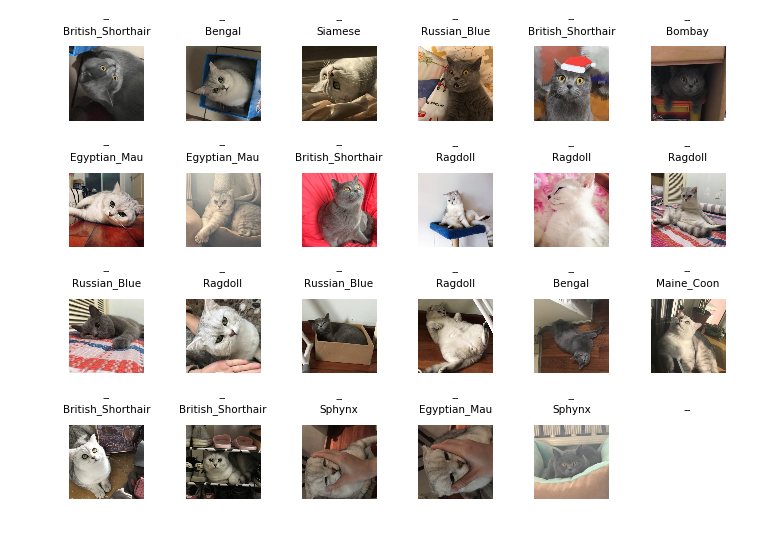

In [1]:
import torch
from PIL import Image
import torchvision
import numpy as np
import utils
import json
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
IMG_SIZE=(300,300)
vgg16 = torch.load('./cat_breed_vgg16.pth', map_location=torch.device(device))
with open("./cat-breed-classes.json","r") as fp1:
    classes = json.load(fp1)
    classes = {k:int(v) for k,v in classes.items()}
    classes_rev = {int(v):k for k,v in classes.items()}
print(classes_rev)
def recognize_img(img_paths):
    imgs=[]
    for img_path in img_paths:
        img_bytes = Image.open(img_path)
        img = torchvision.transforms.functional.resize(img=img_bytes,size=IMG_SIZE)#resize img
        img=(np.array(img)/255.0).astype(np.float32)
        imgs.append(img)
    imgs = np.asarray(imgs)
    #subset=np.append(subset,item[0])
    imgs_tensor = torch.tensor(imgs)
    imgs_tensor = imgs_tensor.to(device)
    b = imgs_tensor.permute(0,3,1,2)

    print(b.shape)
    outputs = vgg16(b)
    outputs = torch.max(outputs, 1)[1].data.cpu().numpy() #convert into array
    print(outputs)
    
    utils.show_imgs(imgs,real_labels=None,pred_labels=outputs,classes_rev=classes_rev)
    
img_paths = [r"C:\Users\Drake Li\Desktop\cwd\ds-stuff\data\etc_imgs\ir{}_cr.jpg".format(i) for i in range(23)]
recognize_img(img_paths)